In [1]:
#To print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv('clean_data.csv')

In [4]:
medal_mapping = {1.0: 'Gold', 2.0: 'Silver', 3.0: 'Bronze'}
df['Medal_Wins'] = df['Medal_count'].map(medal_mapping).fillna('None')

In [5]:
df.head()

,Competition_Name,Competitor,Event_Gender,Event_ID,Event_Name,Sport_Name,NOC,NOC_Name,Person_ID,Result,Result_Type,Sport_ID,Team_ID,Team_Mbrs,Person_Age_Days,Final Rank,Person_Age_Years,Medal_count,Medal_Wins
0,Olympic Games,Jan-Willem van Schip,Men,100009527,Omnium,Cycling - Track,NED,Netherlands,912955,112,Points,305,400000003,NaN,9847.0,6.0,26.0,6.0,None
1,Olympic Games,Roger Kluge,Men,100009527,Omnium,Cycling - Track,GER,Germany,585959,91,Points,305,400000007,NaN,12965.0,9.0,35.0,9.0,None
2,Olympic Games,Gavin Hoover,Men,100009527,Omnium,Cycling - Track,USA,United States,1197380,99,Points,305,400000016,NaN,8790.0,8.0,24.0,8.0,None
3,Olympic Games,Elia Viviani,Men,100009527,Omnium,Cycling - Track,ITA,Italy,697964,124,Points,305,400000020,NaN,11867.0,3.0,32.0,3.0,Bronze
4,Olympic Games,Eiya Hashimoto,Men,100009527,Omnium,Cycling - Track,JPN,Japan,917841,54,Points,305,400000050,NaN,10095.0,15.0,27.0,15.0,None


# Only USA Dataset

In [6]:
#creating a subset from main data when NOC = "USA"
usa = df[df['NOC']=="USA"]

# How has Team USA performed through the years?

In [7]:
#creating a subset of medal winners 
rank123_usa = usa[usa['Medal_count'].isin([1,2,3])]

In [8]:
#to see Tally of Medal Wins in Olympic and Paralympic Games
wins_2020 = rank123_usa.groupby(['Competition_Name', 'Medal_Wins'])['Medal_Wins'].size()


In [9]:
wins_2020

Competition_Name  Medal_Wins
Olympic Games     Bronze        33
                  Gold          39
                  Silver        41
Paralympic Games  Bronze        31
                  Gold          37
                  Silver        36
Name: Medal_Wins, dtype: int64

Historic Data shows <br>
in 2016 Rio Olympics, US won 46 Gold, 37 Silver, 38 Bronze <br>
in 2012 London Olympics, US won 48 Gold, 26 Silver,	30 Bronze
<br>
<br>
in 2016 Rio Olympics, US won 40 Gold, 44 Silver, 31 Bronze <br>
in 2012 London Olympics, US won 31 Gold, 29 Silver,	38 Bronze <br>
_Source : Wikipedia_

In [10]:
# Olympic Games data
olympic_years = [2012, 2016, 2020]
olympic_gold = [48, 46, 39]
olympic_silver = [26, 37, 41]
olympic_bronze = [30, 38, 33]

# Paralympic Games data
paralympic_years = [2012, 2016, 2020]
paralympic_gold = [31, 40, 37]
paralympic_silver = [29, 44, 36]
paralympic_bronze = [38, 31, 31]

Text(0.5, 1.0, 'Olympic Games Medal Wins')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Medals')

Text(0.5, 1.0, 'Paralympic Games Medal Wins')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Medals')

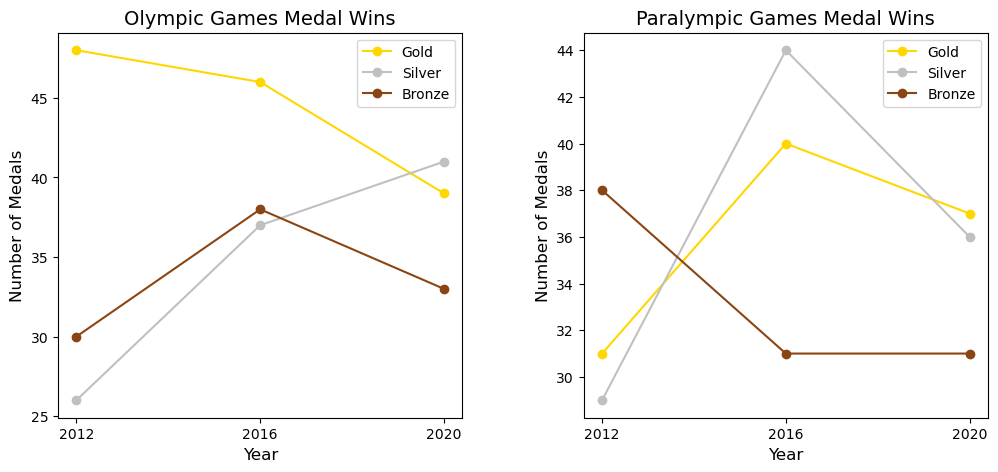

In [11]:
# Creating a figure and two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting the Olympic Games data
ax1.plot(olympic_years, olympic_gold, color='gold', marker='o', label='Gold')
ax1.plot(olympic_years, olympic_silver, color='silver', marker='o', label='Silver')
ax1.plot(olympic_years, olympic_bronze, color='saddlebrown', marker='o', label='Bronze')
ax1.set_title('Olympic Games Medal Wins', fontsize=14)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Medals', fontsize=12)
ax1.set_xticks(olympic_years)  # Set the x-ticks to only show the specified years
ax1.legend()

# Plotting the Paralympic Games data
ax2.plot(paralympic_years, paralympic_gold, color='gold', marker='o', label='Gold')
ax2.plot(paralympic_years, paralympic_silver, color='silver', marker='o', label='Silver')
ax2.plot(paralympic_years, paralympic_bronze, color='saddlebrown', marker='o', label='Bronze')
ax2.set_title('Paralympic Games Medal Wins', fontsize=14)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Number of Medals', fontsize=12)
ax2.set_xticks(paralympic_years)  # Set the x-ticks to only show the specified years
ax2.legend()

# Adjusting the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Displaying the plot
plt.show()

# In which sports did Team USA win the most medals?

In [12]:
# Performing groupby operation to get the count of sports for each competition
results = rank123_usa.groupby(['Competition_Name', 'Sport_Name']).size().reset_index(name='Count')

# Sorting results on the basis of 'Competition_Name' (ascending order) and 'Count' (descending order)
results = results.sort_values(['Competition_Name', 'Count'], ascending=[True, False])

# Using groupby with head to select the top 5 entries for each competition
top_5_results = results.groupby(['Competition_Name']).head(5)

In [13]:
top_5_results

,Competition_Name,Sport_Name,Count
22,Olympic Games,Swimming,30
1,Olympic Games,Athletics,26
28,Olympic Games,Wrestling - Freestyle,9
15,Olympic Games,Gymnastics - Artistic,6
17,Olympic Games,Shooting,6
30,Paralympic Games,PARA - Athletics,41
37,Paralympic Games,PARA - Swimming,35
32,Paralympic Games,PARA - Cycling,8
40,Paralympic Games,PARA - Triathlon,5
33,Paralympic Games,PARA - Equestrian - Dressage,3


<Axes: xlabel='Sport_Name', ylabel='Count'>

Text(0.5, 1.0, 'Top 5 Sports by Participation Count')

Text(0, 0.5, 'Participation Count')

Text(0.5, 0, 'Sport Name')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Swimming'),
  Text(1, 0, 'Athletics'),
  Text(2, 0, 'Wrestling - Freestyle'),
  Text(3, 0, 'Gymnastics - Artistic'),
  Text(4, 0, 'Shooting'),
  Text(5, 0, 'PARA - Athletics'),
  Text(6, 0, 'PARA - Swimming'),
  Text(7, 0, 'PARA - Cycling'),
  Text(8, 0, 'PARA - Triathlon'),
  Text(9, 0, 'PARA - Equestrian - Dressage')])

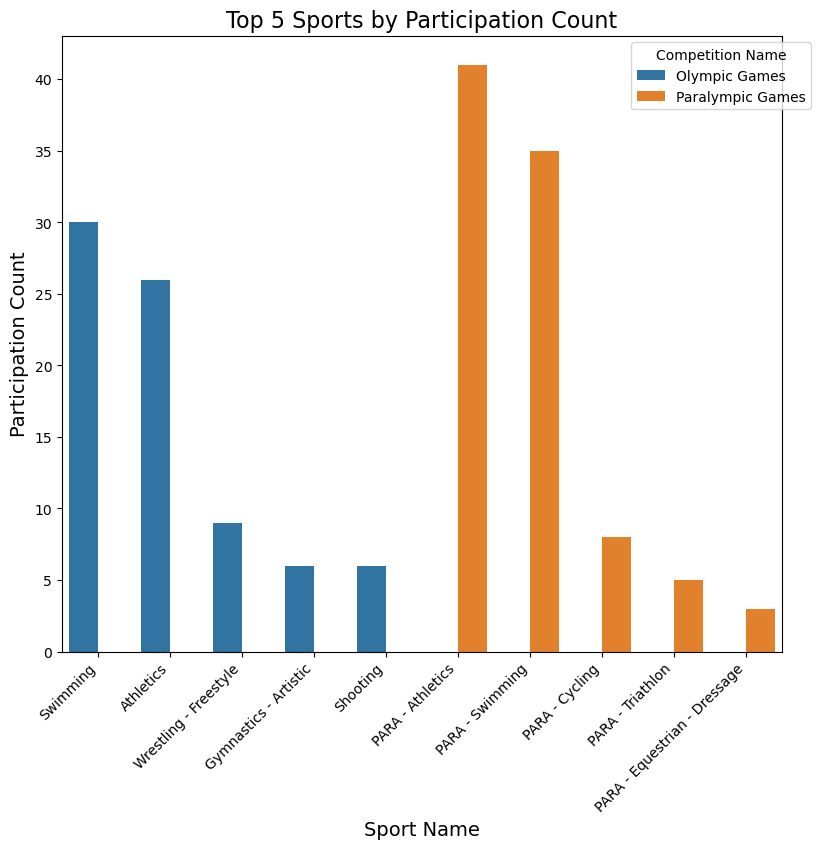

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting a horizontal bar chart
sns.barplot(y='Count', x='Sport_Name', hue='Competition_Name', data=top_5_results, ax=ax)

ax.set_title('Top 5 Sports by Participation Count', fontsize=16)
ax.set_ylabel('Participation Count', fontsize=14)
ax.set_xlabel('Sport Name', fontsize=14)
ax.legend(title='Competition Name', loc='upper right', bbox_to_anchor=(1.05, 1))

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjusting spacing between subplots
plt.subplots_adjust(left=0.3)

# Displaying the plot
plt.show()

# Which Event_Gender won more medals?

In [15]:
#Creating a subgroup on the basis of Event_Gender
event_gender_wins =rank123_usa.groupby('Event_Gender')['Medal_Wins'].value_counts().reset_index(name='Counts')

In [16]:
event_gender_wins

,Event_Gender,Medal_Wins,Counts
0,Men,Gold,30
1,Men,Silver,28
2,Men,Bronze,22
3,Mixed,Silver,4
4,Mixed,Bronze,3
5,Mixed,Gold,1
6,Open,Gold,2
7,Open,Silver,2
8,Open,Bronze,1
9,Women,Gold,43


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Medal Counts by Event Gender and Medal Type')

Text(0.5, 0, 'Event Gender')

Text(0, 0.5, 'Count')

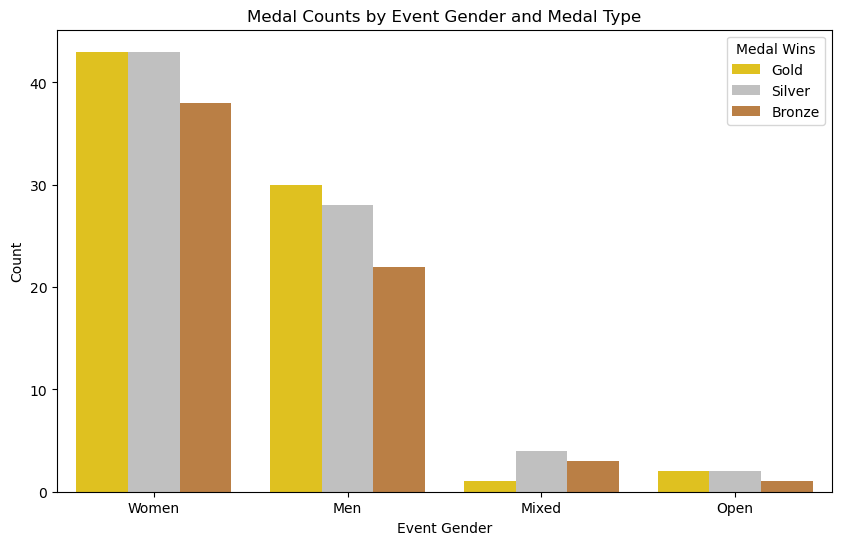

In [17]:
event_gender_wins['Event_Gender'] = pd.Categorical(event_gender_wins['Event_Gender'], categories=['Women', 'Men', 'Mixed', 'Open'], ordered=True)

# Defining a custom color palette for medals
custom_palette = {
    'Gold': '#FFD700',
    'Silver': '#C0C0C0',
    'Bronze': '#CD7F32'
}

# Creating a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Event_Gender', y='Counts', hue='Medal_Wins', data= event_gender_wins, palette=custom_palette)

# Adding titles and labels
plt.title('Medal Counts by Event Gender and Medal Type')
plt.xlabel('Event Gender')
plt.ylabel('Count')
plt.legend(title='Medal Wins')

# Showing the plot
plt.show()

# Did Team USA perform better in team events or individual events?

In [18]:
# Events with Individual Participation have null values in column 'Teams_Mbrs'. So to get count of individual and team 
# events, I'll simply take a count of null and non-null values.

indi_counts = rank123_usa.groupby('Competition_Name')['Team_Mbrs'].apply(lambda x: x.isna().sum())
team_counts = rank123_usa.groupby('Competition_Name')['Team_Mbrs'].apply(lambda x: (~x.isna()).sum())

# Combine the results into a single DataFrame
counts = pd.DataFrame({
    'Individual Participation': indi_counts,
    'Team Participation': team_counts
})

print(counts)

                  Individual Participation  Team Participation
Competition_Name                                              
Olympic Games                           85                  28
Paralympic Games                        94                  10


Text(0.5, 1.0, 'Individual and Team Participation by Competition')

Text(0.5, 0, 'Competition Name')

Text(0, 0.5, 'Participation Count')

(array([0, 1]),
 [Text(0, 0, 'Individual Participation'), Text(1, 0, 'Team Participation')])

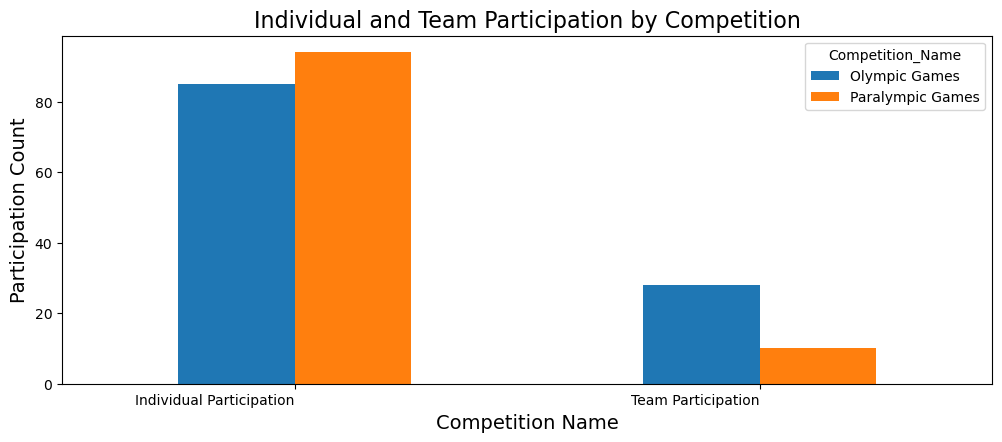

In [19]:
# Transposing the DataFrame to have competitions as rows and participation counts as columns
counts = counts.reset_index().rename(columns={'index': 'Competition_Name'}).set_index('Competition_Name').T

# Creating  a bar plot
fig, ax = plt.subplots(figsize=(12, 6))
ax = counts.plot(kind='bar', ax=ax)

# Setting plot title and axis labels
ax.set_title('Individual and Team Participation by Competition', fontsize=16)
ax.set_xlabel('Competition Name', fontsize=14)
ax.set_ylabel('Participation Count', fontsize=14)

# Rotating x-axis labels for better visibility
plt.xticks(rotation=0, ha='right')

# Adjusting spacing between subplots
plt.subplots_adjust(bottom=0.3)

# Displaying the plot
plt.show()

# How many US Athletes participated in the events?

In [20]:
# Creating a sub group from usa participants dataframe for Olympics and Paralympics
usa_o = usa[usa['Competition_Name']== 'Olympic Games'] 
usa_p = usa[usa['Competition_Name']== 'Paralympic Games']

In [21]:
usa_o['Sport_Name'].unique()

array(['Cycling - Track', 'Mountain Bike', 'Athletics', 'Sailing',
       'Swimming', 'Open Water Swimming', 'Diving', 'Golf', 'Rowing',
       'Triathlon', 'Archery', 'Modern Pentathlon', 'Shooting',
       'Canoe Slalom', 'Gymnastics - Artistic',
       'Gymnastics - Trampolining', 'Tennis', 'Badminton', 'Boxing',
       'Judo', 'Table Tennis', 'Fencing', 'Beach Volleyball',
       'Cycling - Road', 'Karate', 'Basketball', 'Volleyball', 'Baseball',
       'Water Polo', 'BMX Racing', 'Rugby Sevens', 'Surfing',
       'Wrestling - Freestyle', 'Sport Climbing', 'Skateboarding',
       'BMX Freestyle', 'Wrestling - Greco-Roman', 'Weightlifting',
       'Synchronised Swimming', 'Canoe Sprint', 'Gymnastics - Rhythmic',
       'Taekwondo', 'Softball', 'Football', '3x3 Basketball',
       'Equestrian - Dressage', 'Equestrian - Jumping',
       'Equestrian - Eventing'], dtype=object)

In [22]:
# Creating mappings to sort Sports into respective categories 
sport_mapping = {
    'Cycling - Track': 'Cycling',
    'Mountain Bike': 'Cycling',
    'Cycling - Road': 'Cycling',
    'BMX Racing': 'Cycling',
    'BMX Freestyle': 'Cycling',
    'Athletics': 'Athletics',
    'Sailing': 'Sailing',
    'Swimming': 'Aquatics',
    'Open Water Swimming': 'Aquatics',
    'Diving': 'Aquatics',
    'Synchronised Swimming': 'Aquatics',
    'Golf': 'Golf',
    'Rowing': 'Rowing',
    'Triathlon': 'Triathlon',
    'Archery': 'Archery',
    'Modern Pentathlon': 'Modern Pentathlon',
    'Shooting': 'Shooting',
    'Canoe Slalom': 'Canoeing',
    'Canoe Sprint': 'Canoeing',
    'Gymnastics - Artistic': 'Gymnastics',
    'Gymnastics - Trampolining': 'Gymnastics',
    'Gymnastics - Rhythmic': 'Gymnastics',
    'Tennis': 'Tennis',
    'Badminton': 'Badminton',
    'Boxing': 'Boxing',
    'Judo': 'Judo',
    'Table Tennis': 'Table Tennis',
    'Fencing': 'Fencing',
    'Beach Volleyball': 'Volleyball',
    'Volleyball': 'Volleyball',
    'Basketball': 'Basketball',
    '3x3 Basketball': 'Basketball',
    'Baseball': 'Baseball',
    'Softball': 'Softball',
    'Water Polo': 'Water Polo',
    'Rugby Sevens': 'Rugby',
    'Surfing': 'Surfing',
    'Wrestling - Freestyle': 'Wrestling',
    'Wrestling - Greco-Roman': 'Wrestling',
    'Sport Climbing': 'Sport Climbing',
    'Skateboarding': 'Skateboarding',
    'Weightlifting': 'Weightlifting',
    'Taekwondo': 'Taekwondo',
    'Football': 'Football',
    'Equestrian - Dressage': 'Equestrian',
    'Equestrian - Jumping': 'Equestrian',
    'Equestrian - Eventing': 'Equestrian'
}

In [23]:
usa_o['Sport_Categories'] = usa_o['Sport_Name'].replace(sport_mapping)

C:\Users\Uma\AppData\Local\Temp\ipykernel_23832\3403671876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_o['Sport_Categories'] = usa_o['Sport_Name'].replace(sport_mapping)


In [24]:
usa_o['Sport_Name'].nunique()

48

<Figure size 1200x800 with 0 Axes>

<Axes: ylabel='Sport_Categories'>

Text(0.5, 0, 'Number of Athletes')

Text(0, 0.5, 'Sport Categories')

Text(0.5, 1.0, 'Number of US Athletes Participating in Each Sport Category in Tokyo Olympics')

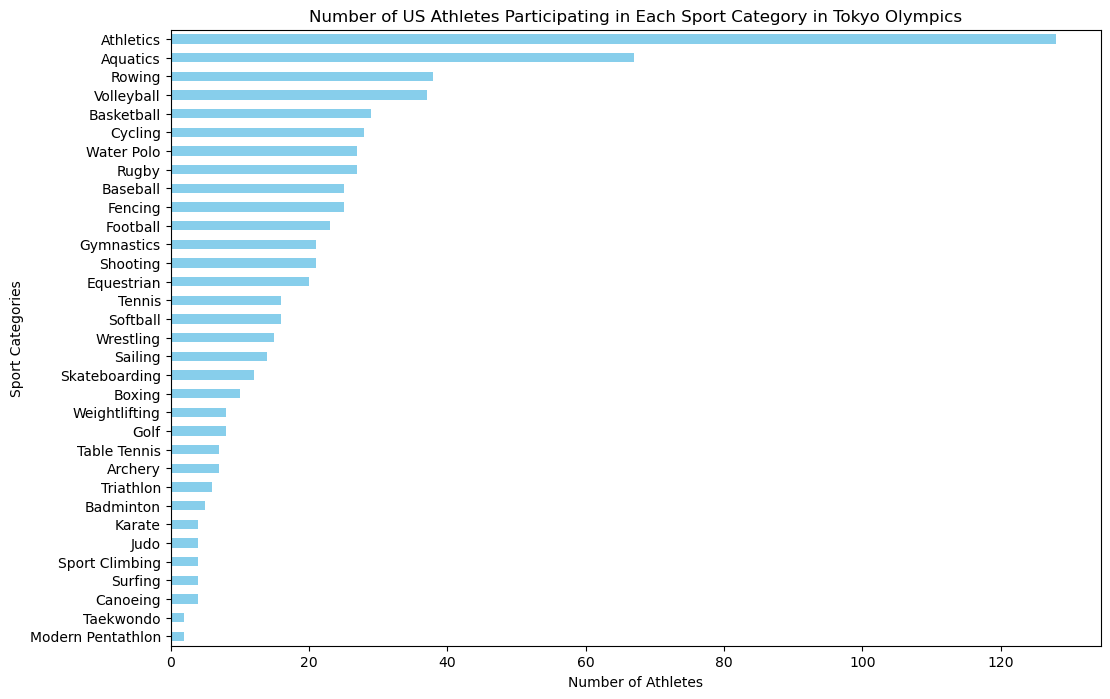

In [25]:
# Count the number of athletes in each sport category
athlete_counts = usa_o.groupby('Sport_Categories')['Competitor'].nunique().sort_values()

# Create a bar chart
plt.figure(figsize=(12, 8))
athlete_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Athletes')
plt.ylabel('Sport Categories')
plt.title('Number of US Athletes Participating in Each Sport Category in Tokyo Olympics')
plt.show()

In [26]:
usa[usa['Competition_Name']== 'Paralympic Games'].groupby('Sport_Name')['Person_ID'].size()

Sport_Name
PARA - Archery                   10
PARA - Athletics                133
PARA - Canoe Sprint               3
PARA - Cycling                   48
PARA - Equestrian - Dressage     11
PARA - Goalball                  14
PARA - Judo                       4
PARA - Powerlifting               1
PARA - Rowing                    13
PARA - Shooting                  16
PARA - Swimming                 127
PARA - Table Tennis              10
PARA - Taekwondo                  2
PARA - Triathlon                 13
Sitting Volleyball               13
Wheelchair Basketball            26
Wheelchair Fencing               14
Wheelchair Rugby                 13
Wheelchair Tennis                16
Name: Person_ID, dtype: int64

<Figure size 1200x800 with 0 Axes>

<Axes: ylabel='Sport_Name'>

Text(0.5, 0, 'Number of Athletes')

Text(0, 0.5, 'Sport Categories')

Text(0.5, 1.0, 'Number of US Athletes Participating in Each Sport Category in Tokyo Paraympics')

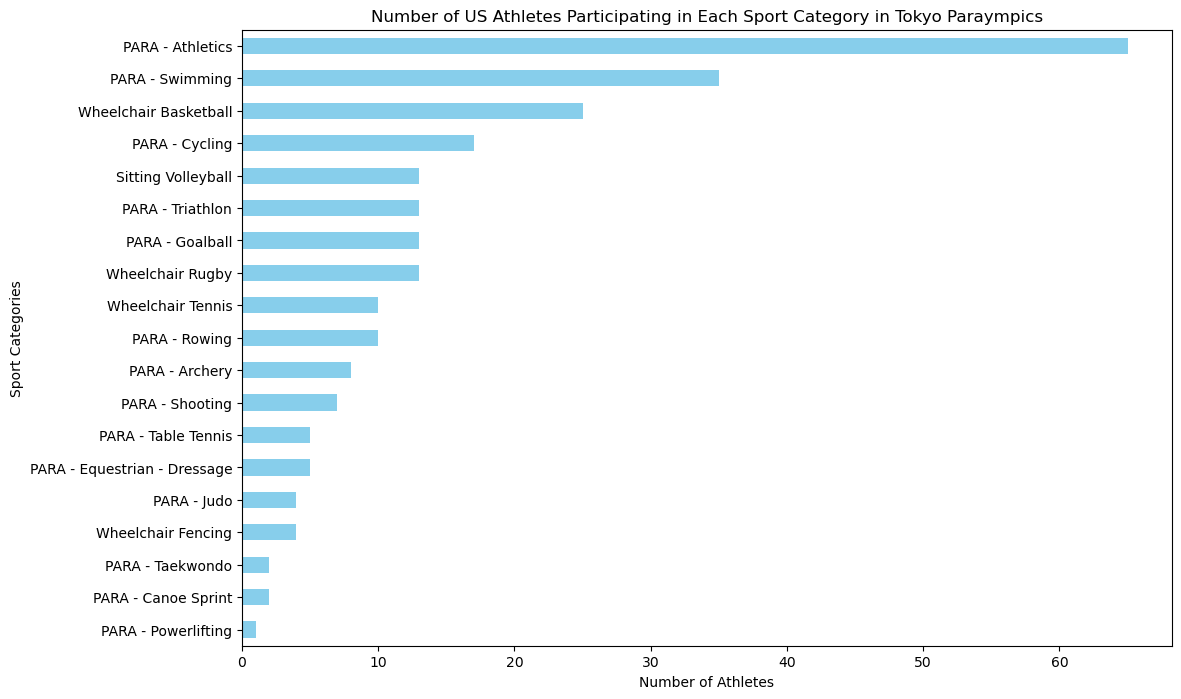

In [27]:
athlete_counts = usa_p.groupby('Sport_Name')['Competitor'].nunique().sort_values()

# Create a bar chart
plt.figure(figsize=(12, 8))
athlete_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Athletes')
plt.ylabel('Sport Categories')
plt.title('Number of US Athletes Participating in Each Sport Category in Tokyo Paraympics')
plt.show()

# How is age distributed among winners?

In [28]:
usa_winners=usa[usa['Final Rank'].isin([1,2,3])]

In [29]:
usa_winners.shape

(500, 19)

In [30]:
#Getting a min and max for age to figure bin size
usa_winners['Person_Age_Years'].min()
usa_winners['Person_Age_Years'].max()

17.0

58.0

C:\Users\Uma\AppData\Local\Temp\ipykernel_23832\1237860727.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_winners['Age_Bins'] = pd.cut(usa_winners['Person_Age_Years'], bins=bins, labels=labels, right=False)


<Figure size 1000x700 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1be3c97dc30>,
 [Text(-0.7228861355744721, -0.8291173831214771, '17-24'),
  Text(1.0961111128408019, 0.09241443776217699, '25-29'),
  Text(0.17733048823071898, 1.0856122226393063, '30-34'),
  Text(-0.484701479254864, 0.9874535310626759, '35-39'),
  Text(-0.6728444186598387, 0.8702185864932463, '40-49'),
  Text(-0.7963975793676988, 0.7587825087449434, '50+')],
 [Text(-0.3943015284951666, -0.45224584533898743, '49.4%'),
  Text(0.5978787888222554, 0.050407875143005626, '26.1%'),
  Text(0.09672572085311944, 0.5921521214396216, '16.1%'),
  Text(-0.2643826250481076, 0.5386110169432776, '3.6%'),
  Text(-0.3670060465417302, 0.47466468354177066, '2.8%'),
  Text(-0.4343986796551084, 0.41388136840633266, '2.0%')])

Text(0.5, 1.0, 'Age Distribution of Team USA Winners in Tokyo Olympics')

(-1.099998684846024,
 1.0999997684715437,
 -1.099999320823389,
 1.0999985604973592)

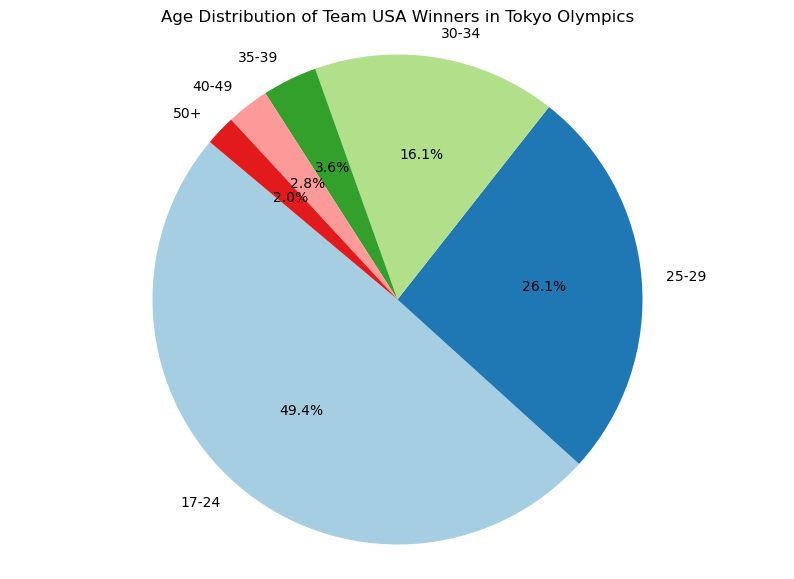

In [31]:
bins = [17, 25, 30, 35, 40, 50, 60]
labels = ['17-24', '25-29', '30-34', '35-39', '40-49', '50+']

# Create a new column for age bins
usa_winners['Age_Bins'] = pd.cut(usa_winners['Person_Age_Years'], bins=bins, labels=labels, right=False)

# Count the number of people in each age bin
age_counts = usa_winners['Age_Bins'].value_counts().sort_index()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Age Distribution of Team USA Winners in Tokyo Olympics')
plt.axis('equal')  
plt.show()